In [30]:
import scipy.io
%matplotlib inline
import matplotlib.pyplot as plt
#import pylab as plt
import networkx as nx
import numpy as np
import string

d = scipy.io.loadmat('D.mat')

for key, value in d.items() :
    mat = value
    
#We can calculate also the mean distance among any two H. sapiens and between Neanderthal and any modern human.
#dist between any two human
human_dist = 206*[0]

for i in range(206):
  for j in range(206):
    if i!=j:
        human_dist[i] += mat[i][j]

print([h/205 for h in human_dist])

#dist between any two human and neas
nea1 = 0
nea2 = 0

for j in range(206):
      nea1 += mat[206][j]
      nea2 += mat[207][j]

print(nea1/206)
print(nea2/206)

[0.060514908352349746, 0.06344179507544659, 0.08797590260000393, 0.11628134418825735, 0.05468293424249473, 0.1177775507507069, 0.07256028797645196, 0.05865744051539947, 0.17153886546109254, 0.06095544750769278, 0.06997383804824825, 0.06386628093818832, 0.08826898696350773, 0.06378288777454137, 0.057636400252234335, 0.059995538287991416, 0.056839151646798175, 0.06672765935924717, 0.11465942285024289, 0.12096607384720906, 0.12072800008353023, 0.05990085040256371, 0.05964496821693559, 0.054805182536005706, 0.08289271967381111, 0.07649013062255046, 0.06356735464042808, 0.0679326316030767, 0.07772233127455655, 0.06810404565376765, 0.06772382889737082, 0.060996176939674435, 0.11199299830818596, 0.05755495831768953, 0.05564149696309564, 0.06683749788559529, 0.058078199004600664, 0.061363281131812684, 0.06108472947266449, 0.06699661371533835, 0.05927602848152724, 0.06399155416646773, 0.06177556884944295, 0.08792140815559267, 0.060492371800242216, 0.0604028785368015, 0.06537305072269435, 0.0577

In [31]:
from __future__ import division
 
import numpy as np
 
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

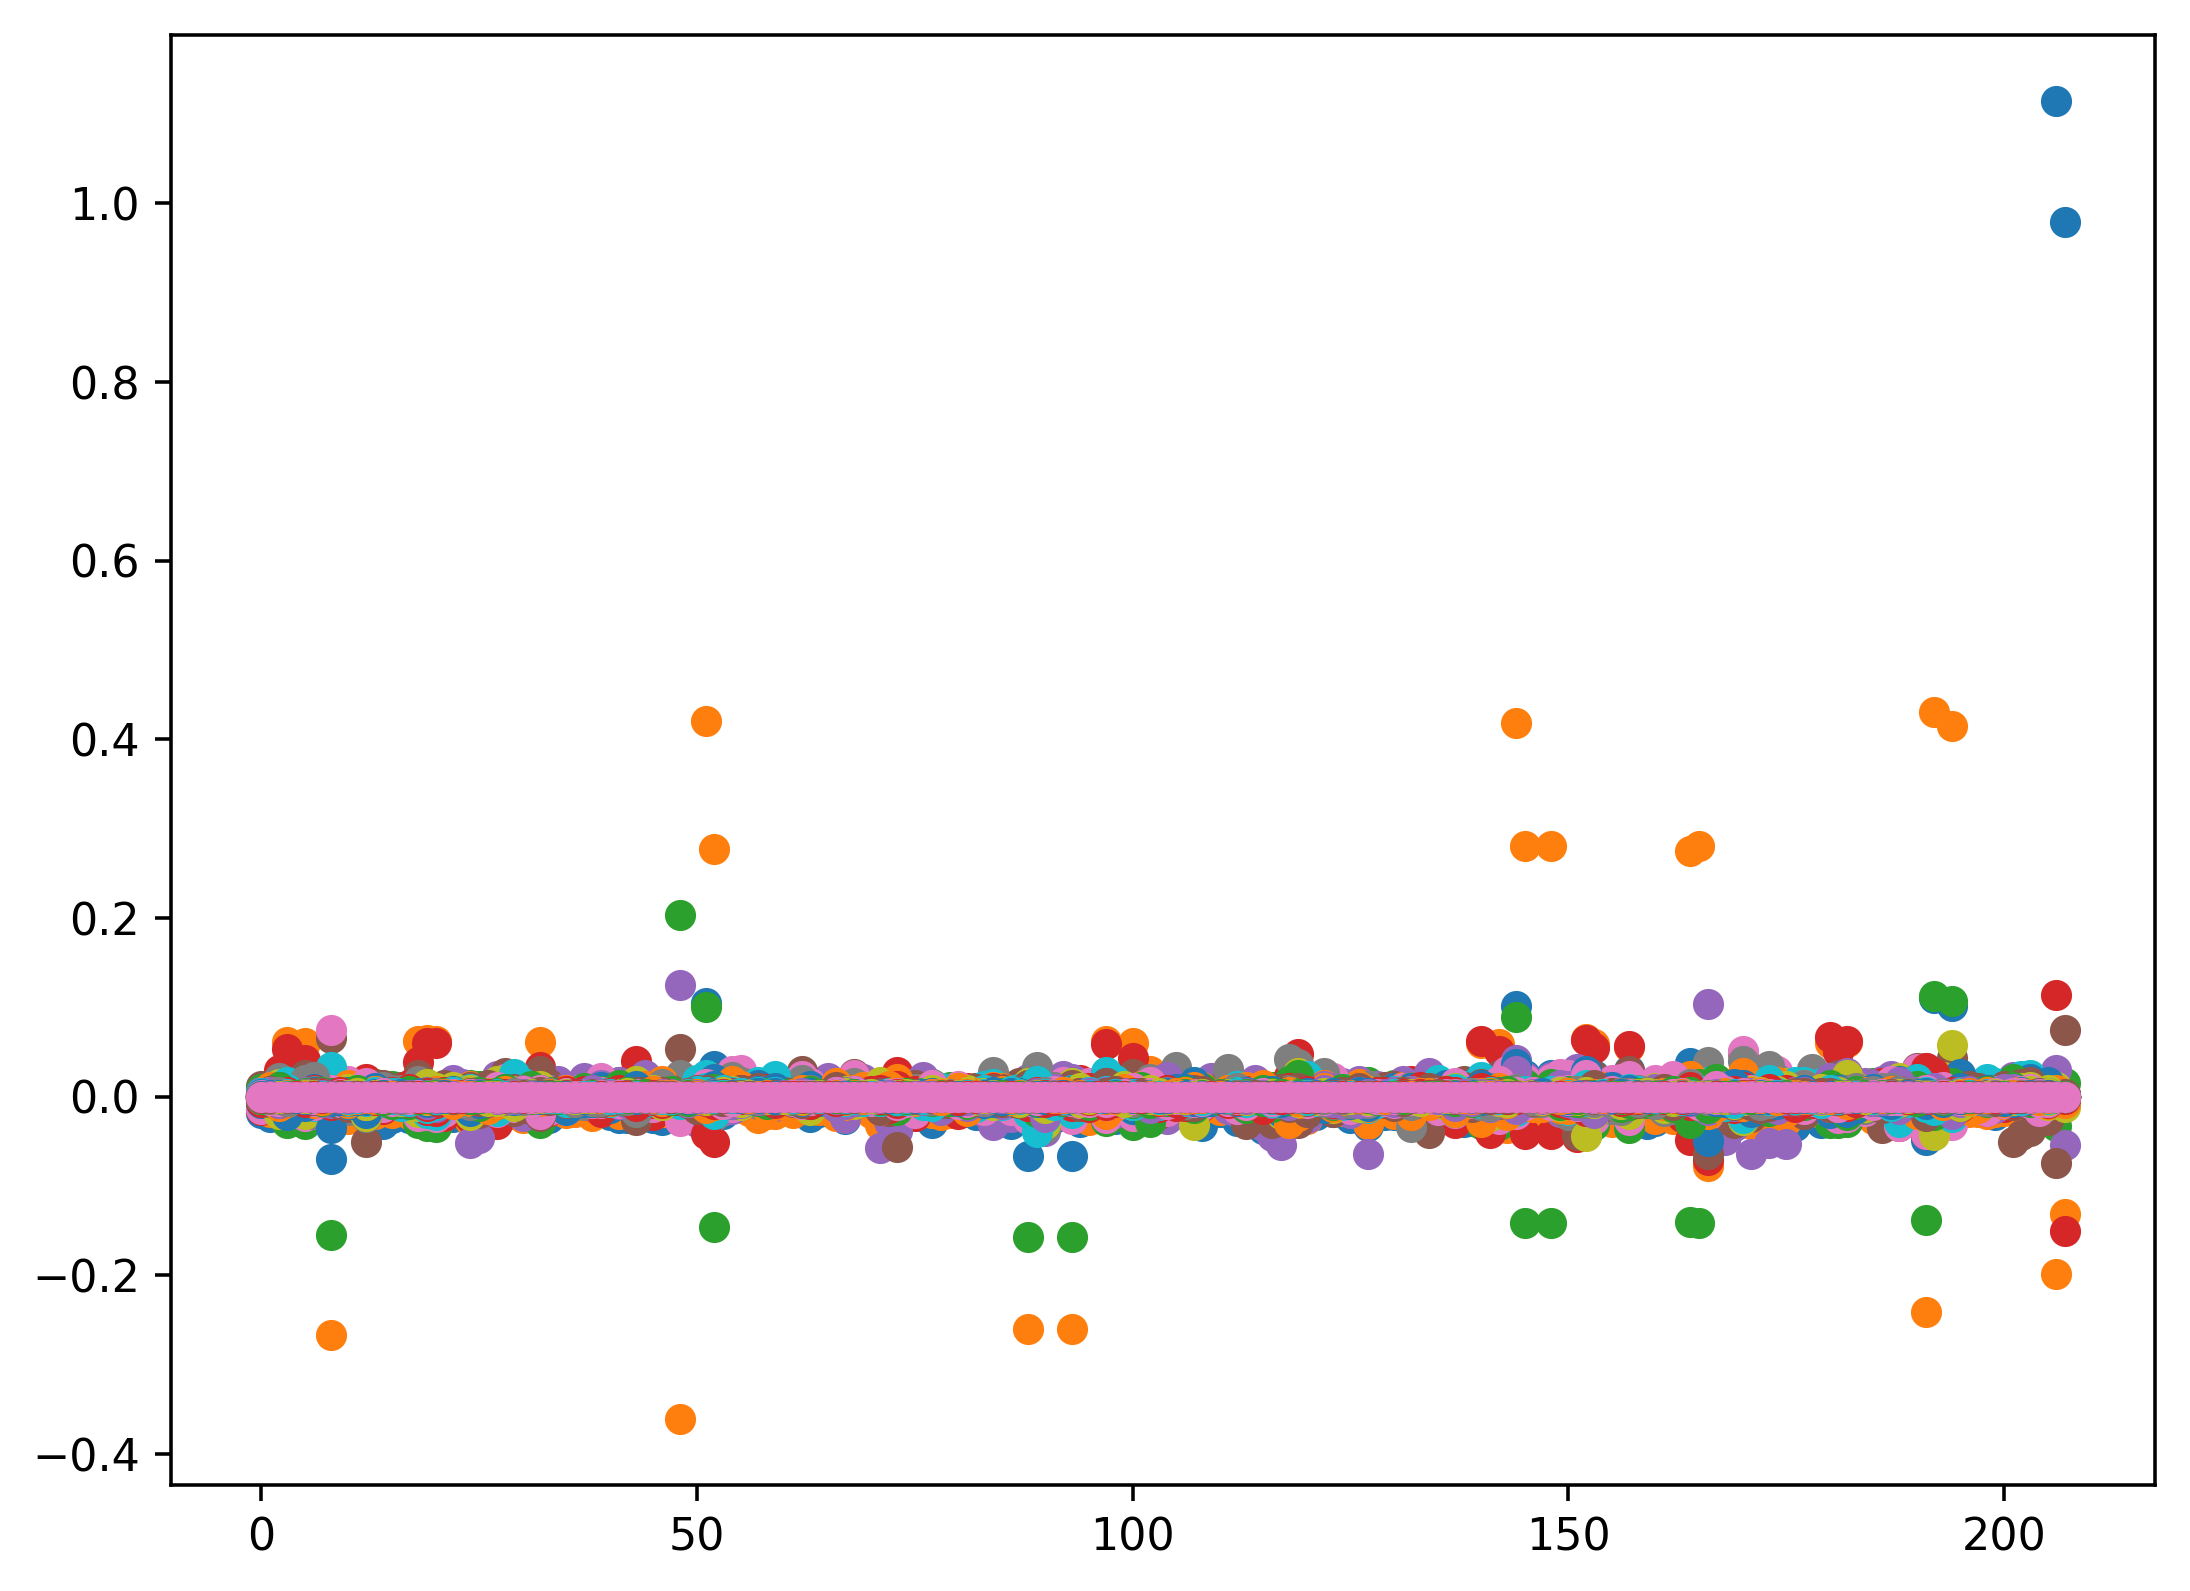

In [32]:
X, _ = cmdscale(mat)
plt.figure(figsize=(8, 6), dpi=320)
plt.plot(X, 'o')
plt.savefig("scatter.png")
